In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
data = np.load('new_feature_matrix.npy')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [16]:
# Indices for the features based on the provided image description
index_median_income = 1  # Median_Household_Income
index_total_population = 2  # Total_Population
index_case_rate = 3  # case_rate
index_raw_visits = 4  # raw_visit_counts

# Extracting the features for X
# We exclude the first time period for raw_visit_counts since there is no t-1 for the first time period
X_median_income = data[2:, :, index_median_income][:, :, np.newaxis]
X_total_population = data[2:, :, index_total_population][:, :, np.newaxis]
X_case_rate =data[:-2, :, index_case_rate][:, :, np.newaxis]
X_raw_visits_t_minus_2 = data[:-2, :, index_raw_visits][:, :, np.newaxis]

# Concatenating the features along the last axis to form the feature matrix X
X = np.concatenate([X_median_income, X_total_population, X_case_rate, X_raw_visits_t_minus_2], axis=2)
X= X.reshape(-1, X.shape[-1])
X= scaler.fit_transform(X)

# The target variable Y is just the raw_visit_counts at time t, which is every time period except the first
Y = data[2:, :, index_raw_visits]
Y = data[2:, :, index_raw_visits].reshape(-1, 1)

Y = scaler.fit_transform(Y)

# Verifying the shapes
X.shape, Y.shape


((15136, 4), (15136, 1))

In [17]:
X_temp, X_test, y_temp, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0)

In [19]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

In [20]:
regressor.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=0)

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2score:',r2_score(y_test,y_pred))

Mean Absolute Error: 0.007854013619572392
Mean Squared Error: 0.0004150884124584656
Root Mean Squared Error: 0.02037371867034748
R2score: 0.8815984979779571


In [23]:
y_pred_val=regressor.predict(X_val)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_val))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_val))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
print('R2score:', r2_score(y_val, y_pred_val))

Mean Absolute Error: 0.007893499701096129
Mean Squared Error: 0.0005732338586561613
Root Mean Squared Error: 0.023942302701623362
R2score: 0.857817979186951


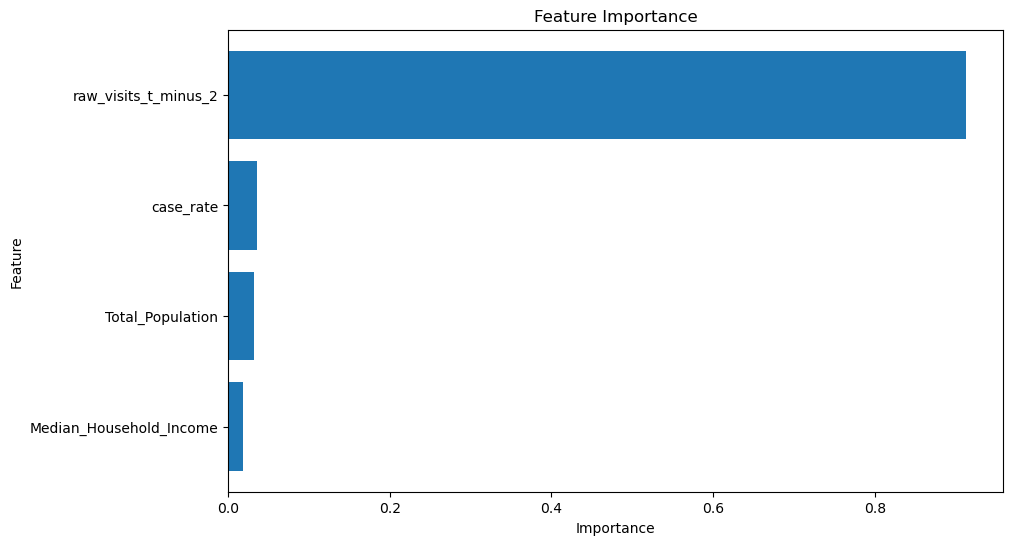

In [24]:
import matplotlib.pyplot as plt

feature_importances = regressor.feature_importances_

feature_names = ['Median_Household_Income', 'Total_Population', 'case_rate','raw_visits_t_minus_2']

# 创建一个特征重要性的DataFrame
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 对特征重要性进行排序
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# 绘制特征重要性图
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 将最重要的特征放在图的顶部
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# 创建随机森林回归器
rf = RandomForestRegressor(random_state=0)

# 创建GridSearchCV对象
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 查看最佳参数
best_params = grid_search.best_params_
best_params


Fitting 3 folds for each of 324 candidates, totalling 972 fits


/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

KeyboardInterrupt: 

In [ ]:
print(importances_df)

In [ ]:
print(best_params)

In [ ]:
regressor1 = RandomForestRegressor(n_estimators=100, 
                                   random_state=0, 
                                   bootstrap=True, 
                                   max_depth=10, 
                                   max_features='sqrt',min_samples_leaf=1,min_samples_split=10)

In [ ]:
regressor1.fit(X_train, y_train)

In [ ]:
y_pred1 = regressor1.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('R2score:',r2_score(y_test,y_pred1))

In [ ]:
y_pred_val1=regressor1.predict(X_val)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_val1))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_val1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val1)))
print('R2score:', r2_score(y_val, y_pred_val1))

In [ ]:
feature_importances1 = regressor1.feature_importances_

feature_names = ['Median_Household_Income', 'Total_Population', 'case_rate','raw_visits_t_minus_2']

# 创建一个特征重要性的DataFrame
importances_df1 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances1
})

# 对特征重要性进行排序
importances_df1 = importances_df1.sort_values(by='Importance', ascending=False)

# 绘制特征重要性图
plt.figure(figsize=(10, 6))
plt.barh(importances_df1['Feature'], importances_df1['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 将最重要的特征放在图的顶部
plt.show()


In [15]:
print(importances_df1)

NameError: name 'importances_df1' is not defined